In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from Utils import prim_dens
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


def generate_points(n, m):
    # Generate n x m matrix of random points in [0, 1]
    x = np.random.rand(n, m)

    # Generate a vector of n random labels (0 or 1)
    y = np.random.choice([0, 1], n, replace=True)

    # Return as a dictionary
    return x, y


In [15]:
def calculate_precision_test_data(lims, x_test, y_test):
    is_within_limits = True

    # Iterate over each row of temp_data
    # Initialize TP, FP, TN, FN counters
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    # Assuming x_test is a 2D NumPy array and y_test is a 1D NumPy array
    for row_index in range(x_test.shape[0]):
        for col_index in range(x_test.shape[1]):
            element = x_test[row_index, col_index]

            # Check if the element is within the limits for the current column
            is_within_limits = (lims.iloc[0, col_index] <= element <= lims.iloc[
                1, col_index]) and is_within_limits  # Calculate column index

        if is_within_limits & (y_test[row_index] == 1):
            tp = tp + 1
        if is_within_limits & (y_test[row_index] == 0):
            fp = fp + 1
        if is_within_limits & (y_test[row_index] == 0):
            tn = tn + 1
        if is_within_limits & (y_test[row_index] == 1):
            fn = fn + 1
        is_within_limits = True

    if (tp == 0):
        return 0
    else:
        return tp / (tp + fp)

In [16]:
def plot_results(pts, res_train, res_test, plt_name):
    plt.plot(pts, res_train, label='train precision', color='blue')

    # Create a line plot for the second data series (y2) in red
    plt.plot(pts, res_test, label='test precision', color='red')

    # Add labels, a title, and a legend
    plt.xlabel('Number of points test set')
    plt.ylabel('Precision')
    plt.title('Precision of Test vs. Train Data')
    plt.legend()

    plt.savefig(plt_name)

    # Show the plot
    return plt

In [17]:
def define_train_test_split(data_name, stratify_feature, drop_feature, test_size):
    if (data_name) == 'Bryant':
        data = pd.read_csv(
            '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Data/Bryant et al 2010.csv')

    else:
        if (data_name) == 'Rozenberg':
            data = pd.read_csv(
                '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Data/Rozenberg et al 2014.csv')

    temp_data = data
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)
    
    data = pd.DataFrame(data, index = temp_data.index, columns=temp_data.columns)
    
    #sampeling a subset of the whole data set
    sample_train, sample_test = train_test_split(data, test_size=test_size, stratify=data[stratify_feature])

    sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
    sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

    y = sample_train[stratify_feature]
    temp_data = pd.DataFrame(sample_train.drop(columns=drop_feature))
    x = temp_data.values

    y_test = sample_test[stratify_feature]
    temp_data = pd.DataFrame(sample_test.drop(columns=drop_feature))
    x_test = temp_data.values

    return x, y, x_test, y_test

experiment 8/8

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

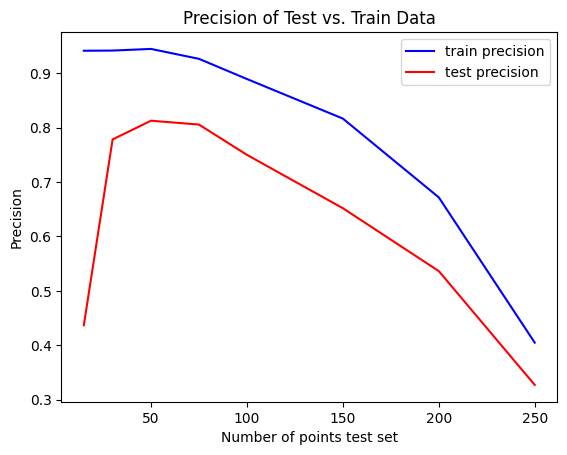

In [18]:
pts = [15, 30, 50, 75, 100, 150, 200, 250]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(100):  # for each dataset size (n rows, m columns) do five experiments and average the results
        
        x, y, x_test, y_test = define_train_test_split('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4'], pts[n])

        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))

        prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
        prim_alg.fit()
        precisions = prim_alg.get_precisions()
        if len(precisions) <= 0:
            prec_train.append(0)
        else:
            prec_train.append(precisions[len(precisions)-1])
        boxes = prim_alg.get_boxes()
        if len(boxes) <= 0:
            prec_test.append(0)
        else:
            box = boxes[len(boxes) - 1]
            box = pd.DataFrame(box)
            prec_test.append(calculate_precision_test_data(box, x_test, y_test))

    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1

plt_name = 'Results_Prim_Varying_Size/' + 'Precision_varied_Size_Rozenberg2014_Feature_SSP1.png'

plot_results(pts, res_train, res_test, plt_name)

experiment 8/8

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

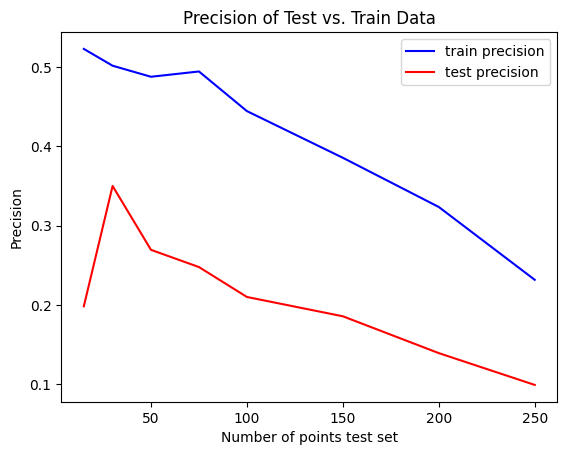

In [19]:
pts = [15, 30, 50, 75, 100, 150, 200, 250]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(100):  # for each dataset size (n rows, m columns) do five experiments and average the results
        
        x, y, x_test, y_test = define_train_test_split('Rozenberg', 'SSP2', ['SSP1', 'SSP2', 'SSP3', 'SSP4'], pts[n])

        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))

        prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
        prim_alg.fit()
        precisions = prim_alg.get_precisions()
        if len(precisions) <= 0:
            prec_train.append(0)
        else:
            prec_train.append(precisions[len(precisions)-1])
        boxes = prim_alg.get_boxes()
        if len(boxes) <= 0:
            prec_test.append(0)
        else:
            box = boxes[len(boxes) - 1]
            box = pd.DataFrame(box)
            prec_test.append(calculate_precision_test_data(box, x_test, y_test))

    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1

plt_name = 'Results_Prim_Varying_Size/' + 'Precision_varied_Size_Rozenberg2014_Feature_SSP2.png'

plot_results(pts, res_train, res_test, plt_name)

experiment 8/8

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

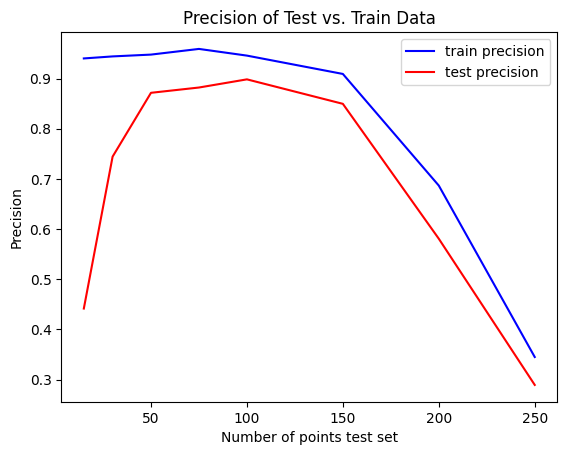

In [20]:
pts = [15, 30, 50, 75, 100, 150, 200, 250]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(100):  # for each dataset size (n rows, m columns) do five experiments and average the results
        
        x, y, x_test, y_test = define_train_test_split('Rozenberg', 'SSP3', ['SSP1', 'SSP2', 'SSP3', 'SSP4'], pts[n])

        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))

        prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
        prim_alg.fit()
        precisions = prim_alg.get_precisions()
        if len(precisions) <= 0:
            prec_train.append(0)
        else:
            prec_train.append(precisions[len(precisions)-1])
        boxes = prim_alg.get_boxes()
        if len(boxes) <= 0:
            prec_test.append(0)
        else:
            box = boxes[len(boxes) - 1]
            box = pd.DataFrame(box)
            prec_test.append(calculate_precision_test_data(box, x_test, y_test))

    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1

plt_name = 'Results_Prim_Varying_Size/' + 'Precision_varied_Size_Rozenberg2014_Feature_SSP3.png'

plot_results(pts, res_train, res_test, plt_name)

experiment 8/8

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

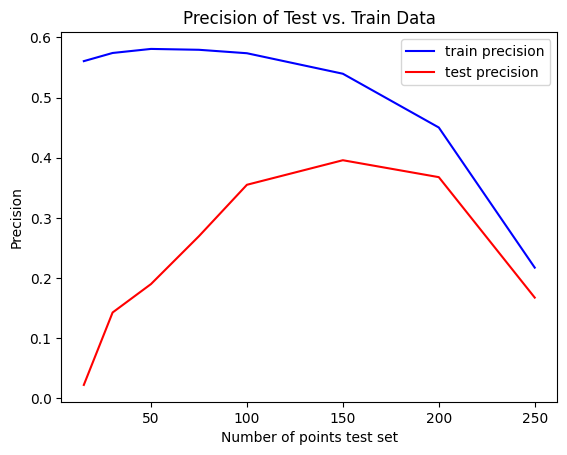

In [21]:
pts = [15, 30, 50, 75, 100, 150, 200, 250]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(100):  # for each dataset size (n rows, m columns) do five experiments and average the results
        
        x, y, x_test, y_test = define_train_test_split('Rozenberg', 'SSP4', ['SSP1', 'SSP2', 'SSP3', 'SSP4'], pts[n])

        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))

        prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
        prim_alg.fit()
        precisions = prim_alg.get_precisions()
        if len(precisions) <= 0:
            prec_train.append(0)
        else:
            prec_train.append(precisions[len(precisions)-1])
        boxes = prim_alg.get_boxes()
        if len(boxes) <= 0:
            prec_test.append(0)
        else:
            box = boxes[len(boxes) - 1]
            box = pd.DataFrame(box)
            prec_test.append(calculate_precision_test_data(box, x_test, y_test))

    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1

plt_name = 'Results_Prim_Varying_Size/' + 'Precision_varied_Size_Rozenberg2014_Feature_SSP4.png'

plot_results(pts, res_train, res_test, plt_name)

experiment 6/6

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

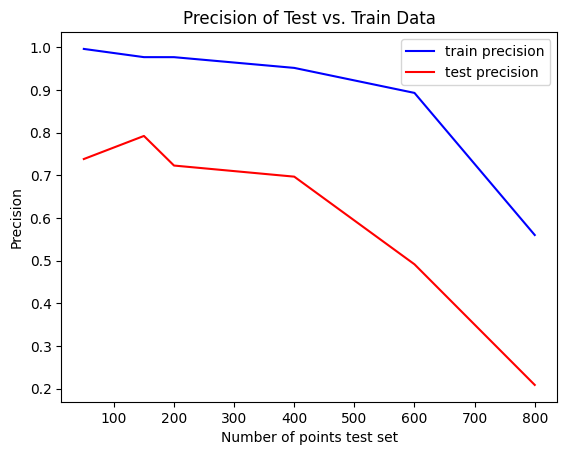

In [22]:
pts = [50, 150, 200, 400, 600, 800]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
        
        x, y, x_test, y_test = define_train_test_split('Bryant', 'Greater than 90%', ['Less than 10%', 'Greater than 90%'], pts[n]) 

        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))

        prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
        prim_alg.fit()
        precisions = prim_alg.get_precisions()
        if len(precisions) <= 0:
            prec_train.append(0)
        else:
            prec_train.append(precisions[len(precisions)-1])
        boxes = prim_alg.get_boxes()
        if len(boxes) <= 0:
            prec_test.append(0)
        else:
            box = boxes[len(boxes) - 1]
            box = pd.DataFrame(box)
            prec_test.append(calculate_precision_test_data(box, x_test, y_test))

    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1

plt_name = 'Results_Prim_Varying_Size/' + 'Precision_varied_Size_Bryant2010_Feature_GreaterThan10.png'

plot_results(pts, res_train, res_test, plt_name)

In [24]:
pts = [50, 150, 200, 400, 600, 800]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
        
        x, y, x_test, y_test = define_train_test_split('Bryant','Greater than 90%' , ['Less than 10%', 'Greater than 90%'], pts[n]) 

        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))

        prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
        prim_alg.fit()
        precisions = prim_alg.get_precisions()
        if len(precisions) <= 0:
            prec_train.append(0)
        else:
            prec_train.append(precisions[len(precisions)-1])
        boxes = prim_alg.get_boxes()
        if len(boxes) <= 0:
            prec_test.append(0)
        else:
            box = boxes[len(boxes) - 1]
            box = pd.DataFrame(box)
            prec_test.append(calculate_precision_test_data(box, x_test, y_test))

    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1

plt_name = 'Results_Prim_Varying_Size/' + 'Precision_varied_Size_Bryant2010_Feature_LowerThan90.png'

plot_results(pts, res_train, res_test, plt_name)

experiment 4/6

KeyboardInterrupt: 